<a href="https://colab.research.google.com/github/marcoosnt1/100_days_python/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

É uma constante que a violência atinge todo o Brasil, e vem ganhando cada vez mais destaque nos noticiários e midia no geral.

Hoje em dia, com as leis de acesso à informação e a conscientização dos órgãos públicos, tem se aumentado cada vez mais as fontes disponiveis com dados.

Um exemplo disso, é o governo do Rio de Janeiro, que traz a iniciativa do portal ISPDados. Neste projeto, farei uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

## Obtenção dos Dados

Estes dados foram obtidos através do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas são construídas por meio dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, e também de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Com o objetivo de se criar um controle de qualidade maior, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). Estas estatísticas produzidas  baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Neste dataset, o arquivo csv pode ser baixado diretamente neste link.

### Importando os dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#importando o arquivo 
df= pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados




In [ ]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 236 entries, (2000, 1) to (2019, 8)
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hom_doloso                  236 non-null    int64  
 1   lesao_corp_morte            236 non-null    float64
 2   latrocinio                  236 non-null    int64  
 3   hom_por_interv_policial     236 non-null    float64
 4   tentat_hom                  236 non-null    int64  
 5   lesao_corp_dolosa           236 non-null    int64  
 6   estupro                     200 non-null    float64
 7   hom_culposo                 236 non-null    float64
 8   lesao_corp_culposa          236 non-null    float64
 9   roubo_comercio              236 non-null    int64  
 10  roubo_residencia            236 non-null    int64  
 11  roubo_veiculo               236 non-null    int64  
 12  roubo_carga                 236 non-null    int64  
 13  roubo_transeunte     

In [5]:
#renomeando a variavel ano
df = df.rename(columns={'vano': 'ano'})

In [6]:
df_tempo=df.set_index(['ano', 'mes'])

In [ ]:
df.head()

hom_doloso  lesao_corp_morte  latrocinio  hom_por_interv_policial  \
ano  mes                                                                      
2000 1           547              11.0          13                     37.0   
     2           500               6.0          11                     32.0   
     3           572              12.0          12                     25.0   
     4           546               7.0          19                     22.0   
     5           577               7.0          13                     30.0   

          tentat_hom  lesao_corp_dolosa  estupro  hom_culposo  \
ano  mes                                                        
2000 1           190               6254      NaN        264.0   
     2           202               5983      NaN        252.0   
     3           241               5891      NaN        202.0   
     4           208               5594      NaN        192.0   
     5           193               5466      NaN        248.0   

          lesao_corp_culposa  roubo_comercio  ...  pessoas_desaparecidas  \
ano  mes                                      ...                          
2000 1                6254.0             373  ...                    NaN   
     2                5983.0             369  ...                    NaN   
     3                5891.0             391  ...                    NaN   
     4                5594.0             428  ...                    NaN   
     5                5466.0             438  ...                    NaN   

          encontro_cadaver  encontro_ossada  pol_militares_mortos_serv  \
ano  mes                                                                 
2000 1                  71              NaN                        NaN   
     2                  79              NaN                        NaN   
     3                  99              NaN                        NaN   
     4                  96              NaN                        NaN   
     5                  82              NaN                        NaN   

          pol_civis_mortos_serv  indicador_letalidade  indicador_roubo_rua  \
ano  mes                                                                     
2000 1                      NaN                   608                 1911   
     2                      NaN                   549                 2367   
     3                      NaN                   621                 2276   
     4                      NaN                   594                 2146   
     5                      NaN                   627                 2426   

          indicador_roubo_veic  registro_ocorrencias  fase  
ano  mes                                                    
2000 1                    2165               33870.0     3  
     2                    2257               36131.0     3  
     3                    2503               37426.0     3  
     4                    2749               35786.0     3  
     5                    2757               37301.0     3  

[5 rows x 54 columns]

In [ ]:
#verificando tamanho
df.shape

(344, 56)

In [ ]:
#verificando valores nulos
df.isnull().sum()/df.shape[0]*100

hom_doloso                     0.000000
lesao_corp_morte               0.000000
latrocinio                     0.000000
hom_por_interv_policial        0.000000
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       15.254237
hom_culposo                    0.000000
lesao_corp_culposa             0.000000
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           15.254237
roubo_celular                  0.000000
roubo_conducao_saque          15.254237
roubo_apos_saque              15.254237
roubo_bicicleta               71.186441
outros_roubos                  0.000000
total_roubos                   0.000000
furto_veiculos                 0.000000
furto_transeunte               0.000000


In [ ]:
df_ano= df.ano.unique()
print('A serie histórica  foi de {} a {}'.format(df_ano[0],df_ano[-1]))

A serie histórica  foi de 1991 a 2019


In [7]:
#extraindo dados a partir dos anos 2000.
#criando a variavel 
df_menor_2000= df[df.ano < 2000]
#limpando o dataset
df = df.drop(df_menor_2000.index, axis=0)
#verificacao 
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
108,2000,1,547,11.0,13,37.0,190,6254,NaN,264.0,...,NaN,71,NaN,NaN,NaN,608,1911,2165,33870.0,3
109,2000,2,500,6.0,11,32.0,202,5983,NaN,252.0,...,NaN,79,NaN,NaN,NaN,549,2367,2257,36131.0,3
110,2000,3,572,12.0,12,25.0,241,5891,NaN,202.0,...,NaN,99,NaN,NaN,NaN,621,2276,2503,37426.0,3
111,2000,4,546,7.0,19,22.0,208,5594,NaN,192.0,...,NaN,96,NaN,NaN,NaN,594,2146,2749,35786.0,3
112,2000,5,577,7.0,13,30.0,193,5466,NaN,248.0,...,NaN,82,NaN,NaN,NaN,627,2426,2757,37301.0,3


## Informações Estatísticas da Violência no Rio de Janeiro



In [ ]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,200.000000,236.000000,...,212.000000,236.000000,212.000000,200.000000,200.00000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,2009.338983,6.432203,457.847458,4.110169,15.470339,76.483051,383.851695,6342.855932,369.945000,199.449153,...,435.132075,62.262712,3.301887,2.085000,0.34000,553.911017,6248.508475,2696.330508,54847.936441,2.991525
std,5.691682,3.445574,88.401225,2.422532,5.541638,35.091790,97.783865,866.303772,94.392434,36.092575,...,65.353516,32.448435,2.192922,1.761616,0.63752,103.351314,2762.927900,803.812342,10245.738491,0.091861
min,2000.000000,1.000000,272.000000,0.000000,5.000000,15.000000,186.000000,2521.000000,188.000000,111.000000,...,236.000000,16.000000,0.000000,0.000000,0.00000,334.000000,1911.000000,1413.000000,31231.000000,2.000000
25%,2004.000000,3.000000,381.750000,2.000000,11.000000,48.750000,315.750000,5709.500000,282.000000,174.750000,...,390.000000,39.000000,2.000000,1.000000,0.00000,477.000000,3492.250000,2225.500000,46532.750000,3.000000
50%,2009.000000,6.000000,462.500000,4.000000,15.000000,74.000000,362.500000,6324.500000,384.000000,196.000000,...,427.000000,50.000000,3.000000,2.000000,0.00000,564.500000,5946.500000,2555.500000,55252.000000,3.000000
75%,2014.000000,9.000000,527.250000,6.000000,19.000000,100.250000,458.500000,6887.000000,441.250000,225.250000,...,481.500000,81.250000,4.000000,3.000000,1.00000,627.000000,7734.500000,3056.000000,63817.250000,3.000000
max,2019.000000,12.000000,682.000000,12.000000,31.000000,194.000000,645.000000,9050.000000,561.000000,299.000000,...,628.000000,186.000000,13.000000,10.000000,3.00000,804.000000,13833.000000,5358.000000,75403.000000,3.000000


In [ ]:
df['total_roubos'].describe()

count      236.000000
mean     11674.788136
std       3756.906040
min       6283.000000
25%       9135.750000
50%      10413.500000
75%      12602.000000
max      23203.000000
Name: total_roubos, dtype: float64

Durante o periodo analisado houve um max de 23203 roubos, e a média  foi de 11674 roubos

In [ ]:
df['total_furtos'].describe()

count      236.000000
mean     12431.110169
std       2636.742061
min       5795.000000
25%      10328.250000
50%      13153.000000
75%      14328.750000
max      18003.000000
Name: total_furtos, dtype: float64

Durante o periodo analisado houve um max de 18803 furtos, e a média  foi de 12431 roubos

**Analisando furtos e roubos de veiculos**

In [ ]:
roubo_media=df['roubo_veiculo'].mean()
print('A media de roubo de veiculos é de {} veiculos por mês'.format(round(roubo_media,2)))

A media de roubo de veiculos é de 2696.33 por mês


In [ ]:
furto_media=df['furto_veiculos'].mean()
print('A media de furtos de veiculos é de {} veiculos por mês'.format(round(furto_media,2)))

A media de furtos de veiculos é de 1549.33 veiculos por mês


**Análise de homicidio dolosos**

In [ ]:
df['hom_doloso'].describe()

count    236.000000
mean     457.847458
std       88.401225
min      272.000000
25%      381.750000
50%      462.500000
75%      527.250000
max      682.000000
Name: hom_doloso, dtype: float64

Ja de crimes contra a vida, pode se observar que no dataset analisado houve uma media de 457 homicidios durante o periodo analisado, sendo que o menor numero d registrados foi de 272 homicidios e o maior numer de 682 homicidios 

In [ ]:
##verificando o menor mes e ano em relação a homicidio doloso
df[df['hom_doloso'] == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,...,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


Após essa analise pode se observar que esse numero de homicidios, ocorreu durante o ano de 2015 e o mês de junho

In [ ]:
vida= df_tempo['hom_doloso']
vida= vida.groupby('ano')
vida.sum()

ano
2000    6287
2001    6163
2002    6885
2003    6624
2004    6438
2005    6620
2006    6323
2007    6133
2008    5717
2009    5793
2010    4767
2011    4279
2012    4081
2013    4745
2014    4942
2015    4200
2016    5042
2017    5346
2018    4950
2019    2717
Name: hom_doloso, dtype: int64

A partir desta analise podemos notar que o ano com maior numero de mortes é 2002,e o ano com menor numero de homicidios é 2019.
Também percebe-se que houve uma queda significativa dos homicidios durante o periodo analisado

## Visualização de Dados




Text(0.5, 1.0, 'Homicidio doloso por ano')

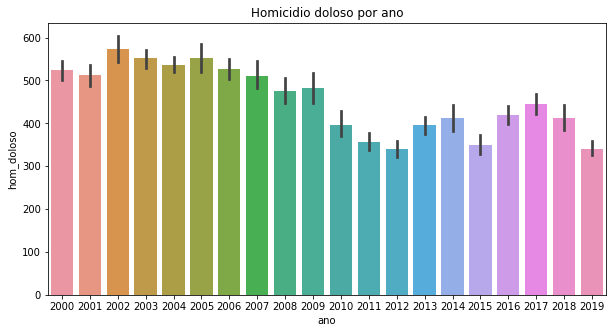

In [8]:
fig,axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=df['ano'],y=df['hom_doloso'])
plt.title('Homicidio doloso por ano') 

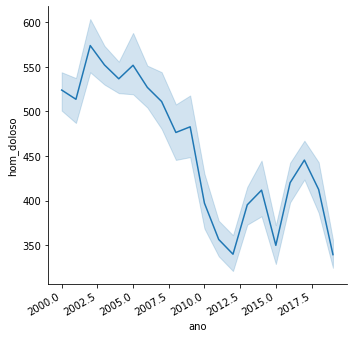

In [ ]:
g = sns.relplot(x="ano", y="hom_doloso", kind="line", data=df)

g.fig.autofmt_xdate()

A partir desta analise podemos notar que durante esta série histórica, houve uma queda significativa nos homicidios

Text(0.5, 1.0, 'Ano e total de furtos ')

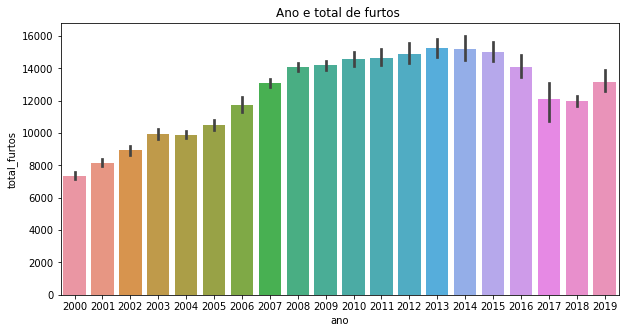

In [9]:
fig,axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=df['ano'],y=df['total_furtos'])
plt.title('Ano e total de furtos ') 

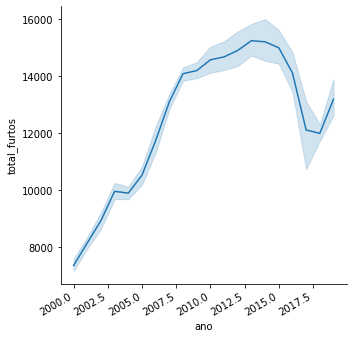

In [ ]:
g = sns.relplot(x="ano", y="total_furtos", kind="line", data=df)

g.fig.autofmt_xdate()

Ja no número de furtos ocorreu uma alta crescente até o ano de 2012, seguido por uma queda significativa 

Text(0.5, 1.0, 'Produção de energia e direção do vento kw')

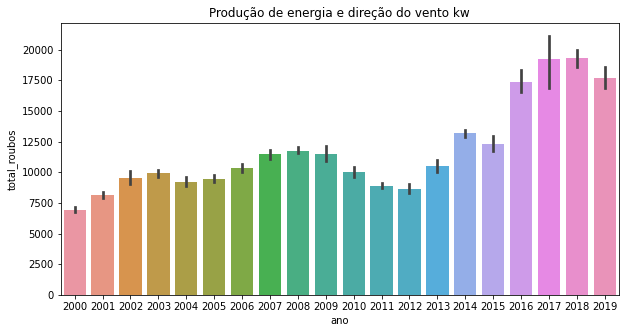

In [ ]:
fig,axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=df['ano'],y=df['total_roubos'])
plt.title('Produção de energia e direção do vento kw') 

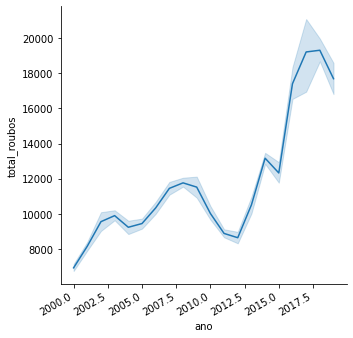

In [ ]:

g = sns.relplot(x="ano", y="total_roubos", kind="line", data=df)

g.fig.autofmt_xdate()

Os roubos durante esse periodo obtiveram uma alta suave durante os periodos de 2000 a 2012,com seu pico no ano de 2016, seguido por uma significativa queda a partir do ano de 2017

## Conclusão

Com esses dados e analises básicas, podemos notar que apesar de altos e baixos, a violência no rio de janeiro sempre foi uma constante. A analise de dados pode ser util neste sentido, pois pode ajudar gestores a tomarem melhores decisões sobre como empregar melhor os recursos publicos e diminuir esses números. Para o futuro, pode se empregar  um estudo através de técnicas de regressões e  séries temporais para prever casos de violência e roubo contra o patrimônio.